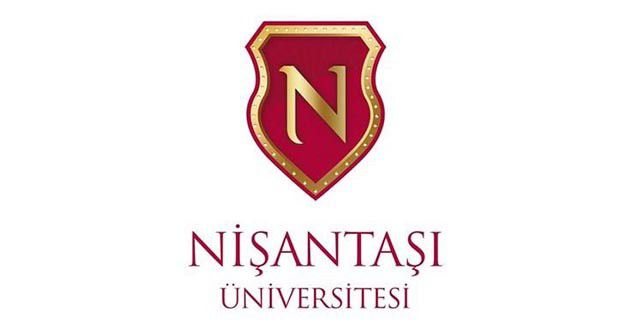 

       Artificial Intelligence - 2022-2023 Fall Semester - Nişantaşı University

               Name & Surname : Mohamed Walid Mazed // Student ID : 20212022333

# Tire Texture Image recogition

link of dataset : https://www.kaggle.com/datasets/jehanbhathena/tire-texture-image-recognition

Intro : 

    Here is how our folder that contains image data is organized: 
        Tire Texture
            ├───testing_data
            │   ├───cracked
            │   └───normal
            └───training_data
            ├───cracked
            └───normal

In [113]:
#importing necessary libraries for array operations, image processing and plotting.
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [114]:
# Load an image using OpenCV
img = cv2.imread("/Users/walidmed/Downloads/Tire Textures/testing_data/cracked/Cracked-1.jpg")

In [115]:
# Display the image shape
print(img.shape)

(748, 748, 3)


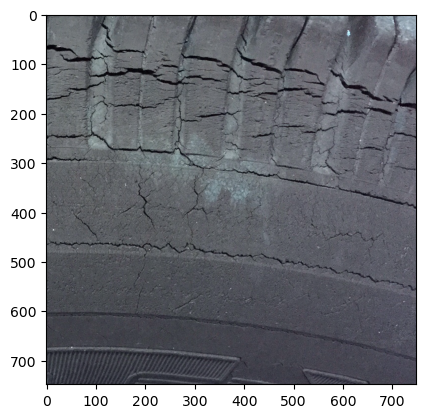

In [58]:
# Display the image using Matplotlib
plt.imshow(img) 
plt.show()

In [125]:
# Define the directories for training and testing data
train_dir = "/Users/walidmed/Downloads/Tire Textures/training_data"
test_dir = "/Users/walidmed/Downloads/Tire Textures/testing_data"

In [126]:
# Define the training data generator
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                        
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                            )

In [127]:
# Define the testing data generator
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

In [128]:
# Flow the training data from the directory
train_data = train_gen.flow_from_directory(train_dir,
                                            target_size = (224,224),
                                            class_mode = "categorical",
                                            batch_size = 32
                                            )

Found 703 images belonging to 2 classes.


In [129]:
# Flow the testing data from the directory
test_data = test_gen.flow_from_directory(test_dir,
                                          target_size = (224,224),
                                          class_mode = "categorical",
                                          batch_size = 32
                                          )

Found 325 images belonging to 2 classes.


In [130]:
# Get the label names from the class indices
label_name = list(train_data.class_indices.keys())


In [131]:
# Print the label names
print(label_name)

['cracked', 'normal']


In [132]:
# Get the first image and label from the training data
image,label = train_data.next()

In [133]:
# Print the image shape and label shape
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 2)


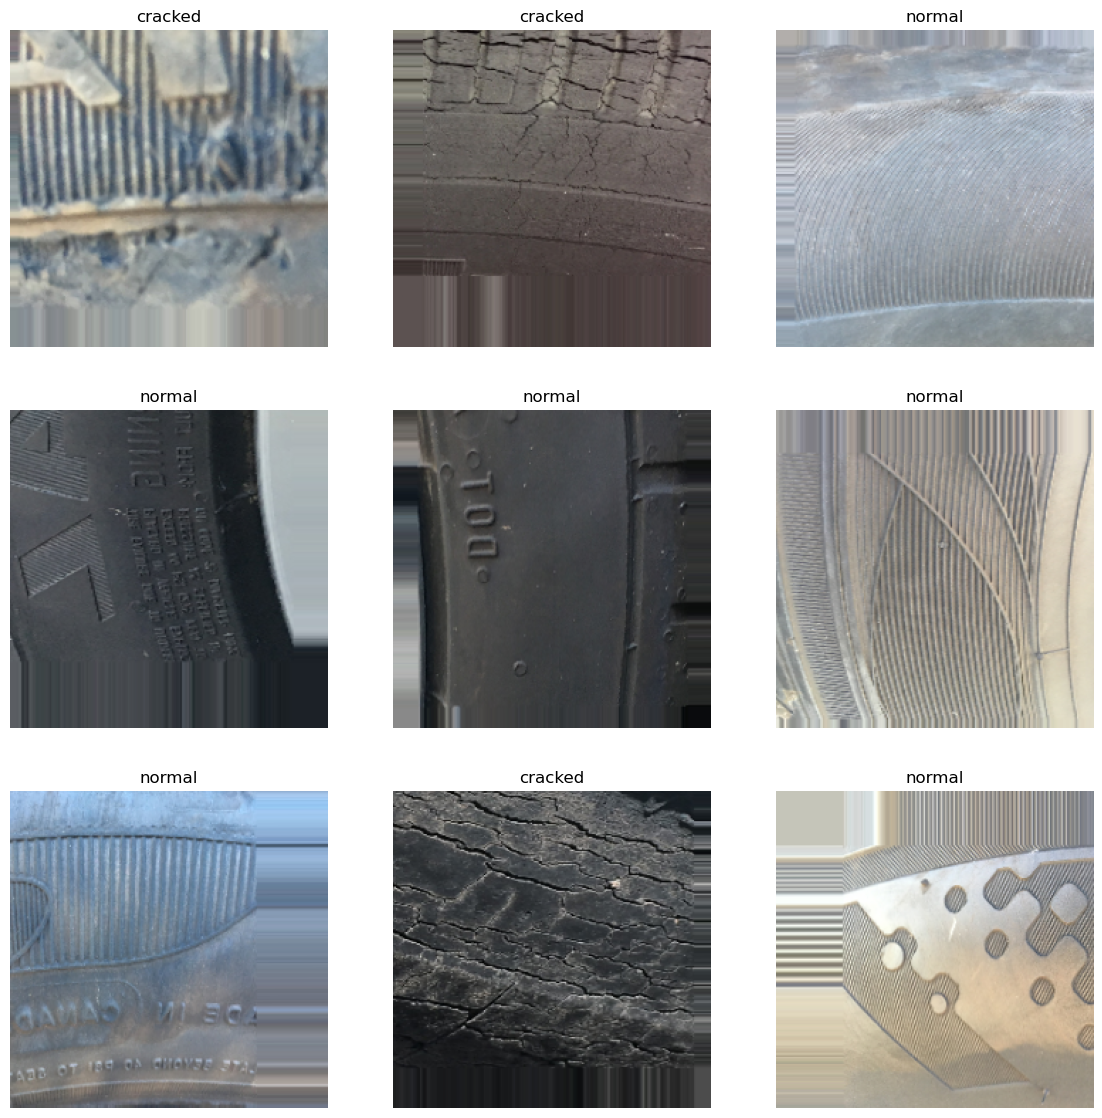

In [134]:
# Display some of the images and labels from the training data using subplots
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with a specific size
plt.figure(figsize=(14,14))

# Iterate through 9 images and labels from the training dataset
for i in range(9):
    # Get the next image and label from the dataset
    image,label = train_data.next()
    
    # Add the image to the figure as a subplot
    plt.subplot(3,3,i+1)
    plt.imshow(image[i])
    
    # Add the label as the title of the subplot
    plt.title(label_name[tf.argmax(label[i])])
    plt.axis("off")

In [141]:
import os

# Set the directory paths for the training data
train_dir = "/Users/walidmed/Downloads/Tire Textures/training_data"

# Initialize variables to count the number of images in each class
cracked_count = 0
normal_count = 0

# Iterate through the subdirectories and count the number of images in each class
for subdir in os.listdir(train_dir):
    if subdir == "cracked":
        cracked_count += len(os.listdir(os.path.join(train_dir, subdir)))
    elif subdir == "normal":
        normal_count += len(os.listdir(os.path.join(train_dir, subdir)))
        
print("Number of Cracked images: ", cracked_count)
print("Number of Normal images: ", normal_count)


Number of Cracked images:  327
Number of Normal images:  376


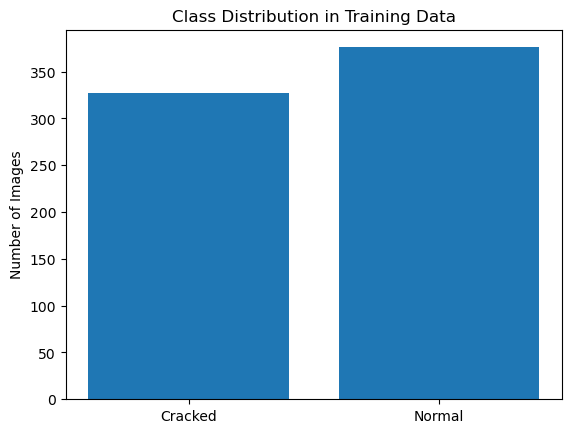

In [140]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the directory paths for the training data
train_dir = "/Users/walidmed/Downloads/Tire Textures/training_data"

# Initialize variables to count the number of images in each class
cracked_count = 0
normal_count = 0

# Iterate through the directories and count the number of images in each class
for subdir, dirs, files in os.walk(train_dir):
    for file in files:
        if "cracked" in subdir:
            cracked_count += 1
        elif "normal" in subdir:
            normal_count += 1

# Create a bar chart to display the class distribution
class_names = ['Cracked', 'Normal']
class_counts = [cracked_count, normal_count]
x_pos = np.arange(len(class_names))

plt.bar(x_pos, class_counts, align='center')
plt.xticks(x_pos, class_names)
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Data')

plt.show()


In [135]:
#Building the CNN model 
import tensorflow as tf

# import the layers module from the tensorflow.keras library
from tensorflow.keras import layers

# Creating a sequential model
model = tf.keras.Sequential([
    # Add a convolutional layer with 13 filters, kernel size of 2 and ReLU activation
    layers.Conv2D(filters= 13, kernel_size= 2, activation="relu", input_shape=(224,224,3)), 
    # Add another convolutional layer with 13 filters, kernel size of 2 and ReLU activation
    layers.Conv2D(filters= 13, kernel_size= 2, activation="relu"),
    # Add a dropout layer with a dropout rate of 0.2
    layers.Dropout(0.2),
    # Add a max pooling layer with a pool size of 2
    layers.MaxPooling2D(pool_size= 2),
    
    # Add another convolutional layer with 13 filters, kernel size of 2 and ReLU activation
    layers.Conv2D(filters= 13, kernel_size = 2, activation= "relu"), 
    # Add another convolutional layer with 13 filters, kernel size of 2 and ReLU activation
    layers.Conv2D(filters= 13, kernel_size= 2, activation= "relu"),
    # Add a dropout layer with a dropout rate of 0.2
    layers.Dropout(0.2),
    # Add a max pooling layer with a pool size of 2
    layers.MaxPooling2D(pool_size= 2),

    # Add another convolutional layer with 13 filters, kernel size of 2 and ReLU activation
    layers.Conv2D(filters= 13, kernel_size = 2, activation= "relu"), 
    # Add another convolutional layer with 13 filters, kernel size of 2 and ReLU activation
    layers.Conv2D(filters= 13, kernel_size= 2, activation= "relu"),
    # Add a dropout layer with a dropout rate of 0.2
    layers.Dropout(0.2),
    # Add a max pooling layer with a pool size of 2
    layers.MaxPooling2D(pool_size= 2),
    # Flatten the output from the convolutional layers
    layers.Flatten(),

    # Add a dense layer with 1024 neurons and ReLU activation
    layers.Dense(1024, activation= "relu"),
    # Add a dropout layer with a dropout rate of 0.2
    layers.Dropout(0.2),
    # Add another dense layer with 1024 neurons and ReLU activation
    layers.Dense(1024, activation = "relu"),
    # Add a dropout layer with a dropout rate of 0.2
    layers.Dropout(0.2),
    # Add another dense layer with 1024 neurons and ReLU activation
    layers.Dense(1024, activation= "relu"),
    # Add a dense layer with 2 neurons and Softmax activation
    layers.Dense(2, activation="softmax")
]) 


In [136]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 223, 223, 13)      169       
                                                                 
 conv2d_15 (Conv2D)          (None, 222, 222, 13)      689       
                                                                 
 dropout_7 (Dropout)         (None, 222, 222, 13)      0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 13)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 110, 110, 13)      689       
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 13)      689       
                                                      

In [137]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [50]:
# fitting the data to the model

model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/10
22/22 [==============================] - 63s 3s/step - loss: 0.7443 - accuracy: 0.5747 - val_loss: 0.7921 - val_accuracy: 0.3662
Epoch 2/10
22/22 [==============================] - 61s 3s/step - loss: 0.6775 - accuracy: 0.5704 - val_loss: 0.6994 - val_accuracy: 0.4954
Epoch 3/10
22/22 [==============================] - 59s 3s/step - loss: 0.6600 - accuracy: 0.6302 - val_loss: 0.6501 - val_accuracy: 0.6431
Epoch 4/10
22/22 [==============================] - 59s 3s/step - loss: 0.6770 - accuracy: 0.5917 - val_loss: 0.6952 - val_accuracy: 0.5262
Epoch 5/10
22/22 [==============================] - 59s 3s/step - loss: 0.6517 - accuracy: 0.6230 - val_loss: 0.7618 - val_accuracy: 0.3846
Epoch 6/10
22/22 [==============================] - 65s 3s/step - loss: 0.6739 - accuracy: 0.6259 - val_loss: 0.7517 - val_accuracy: 0.4400
Epoch 7/10
22/22 [==============================] - 63s 3s/step - loss: 0.6528 - accuracy: 0.5960 - val_loss: 0.6641 - val_accuracy: 0.6738
Epoch 8/10
22/22 [==

In [51]:
# resnet model using transfer learning

import tensorflow as tf

resnet_base = tf.keras.applications.ResNet50V2(include_top= False)

resnet_base.trainable = False

In [107]:
# building the resnet model
import tensorflow as tf
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(224,224,3))

x = resnet_base(inputs)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(2, activation = "softmax")(x)

resnet_model = tf.keras.Model(inputs,outputs)

In [53]:
# compiling the model

resnet_model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [54]:
# fitting data to the model

resnet_model.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
22/22 [==============================] - 93s 4s/step - loss: 0.4699 - accuracy: 0.7895 - val_loss: 0.7827 - val_accuracy: 0.7015
Epoch 2/5
22/22 [==============================] - 89s 4s/step - loss: 0.2318 - accuracy: 0.9203 - val_loss: 0.9595 - val_accuracy: 0.7015
Epoch 3/5
22/22 [==============================] - 86s 4s/step - loss: 0.2305 - accuracy: 0.9132 - val_loss: 1.0834 - val_accuracy: 0.6677
Epoch 4/5
22/22 [==============================] - 107s 5s/step - loss: 0.2010 - accuracy: 0.9260 - val_loss: 0.8805 - val_accuracy: 0.7108
Epoch 5/5
22/22 [==============================] - 93s 4s/step - loss: 0.1884 - accuracy: 0.9346 - val_loss: 0.7820 - val_accuracy: 0.7200


In [80]:
# Tuning the model

resnet_base.trainble = True

for layer in resnet_base.layers[:-3]:
  resnet_base.trainable = False


resnet_model.compile(
     loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

resnet_model.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/10
22/22 [==============================] - 96s 4s/step - loss: 0.0967 - accuracy: 0.9659 - val_loss: 0.6295 - val_accuracy: 0.7600
Epoch 2/10
22/22 [==============================] - 86s 4s/step - loss: 0.0929 - accuracy: 0.9659 - val_loss: 0.7948 - val_accuracy: 0.7354
Epoch 3/10
22/22 [==============================] - 95s 4s/step - loss: 0.1175 - accuracy: 0.9587 - val_loss: 0.7147 - val_accuracy: 0.7508
Epoch 4/10
22/22 [==============================] - 98s 5s/step - loss: 0.0815 - accuracy: 0.9673 - val_loss: 0.7482 - val_accuracy: 0.7538
Epoch 5/10
22/22 [==============================] - 89s 4s/step - loss: 0.0743 - accuracy: 0.9787 - val_loss: 0.7723 - val_accuracy: 0.7508
Epoch 6/10
22/22 [==============================] - 91s 4s/step - loss: 0.0801 - accuracy: 0.9659 - val_loss: 0.5723 - val_accuracy: 0.7723
Epoch 7/10
22/22 [==============================] - 96s 4s/step - loss: 0.0792 - accuracy: 0.9687 - val_loss: 0.6158 - val_accuracy: 0.7631
Epoch 8/10
22/22 [==

In [81]:
resnet_model_evaluation = resnet_model.evaluate(test_data)

11/11 [==============================] - 28s 2s/step - loss: 0.8518 - accuracy: 0.7415


In [144]:
tf.saved_model.save(model, "path/to/save/model")

INFO:tensorflow:Assets written to: path/to/save/model/assets


INFO:tensorflow:Assets written to: path/to/save/model/assets


In [ ]:
#to load the model we can use : loaded_model = tf.saved_model.load("path/to/save/model")

In [82]:
# Print the accuracy of the ResNet model
print(f"Resnet Model Accuracy: {resnet_model_evaluation[1] * 100: 0.2f} %")

Resnet Model Accuracy:  74.15 %


In [83]:
# processing data for efficientnet model
import tensorflow as tf

eff_train = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                image_size = (224,224),
                                                                label_mode = "categorical",
                                                                batch_size = 32                                                            
                                                                )

eff_test = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size = (224,224),
                                                               label_mode = "categorical",
                                                               batch_size = 32
                                                               )

Found 703 files belonging to 2 classes.
Found 325 files belonging to 2 classes.


In [106]:
# Print the shape of the image and label in the test dataset
for image,label in eff_test.take(1):
    print(image.shape)
    print(label.shape)
  # break the loop after the first iteration
    break


(32, 224, 224, 3)
(32, 2)


In [85]:
# building a model on efficientnet
import tensorflow as tf

effnet_base = tf.keras.applications.EfficientNetB5(include_top= False)

effnet_base.trainable = False

In [87]:
# building the resnet model
import tensorflow as tf
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(224,224,3))

x = effnet_base(inputs)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(2, activation = "softmax")(x)

effnet_model = tf.keras.Model(inputs,outputs)

In [88]:
# compiling the model

effnet_model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [89]:
# fitting data to the model

effnet_model.fit(
    eff_train,
    epochs = 5,
    steps_per_epoch = len(eff_train),
    validation_data = eff_test,
    validation_steps = len(eff_test)
)

Epoch 1/5
22/22 [==============================] - 164s 7s/step - loss: 0.4275 - accuracy: 0.8236 - val_loss: 0.5382 - val_accuracy: 0.6954
Epoch 2/5
22/22 [==============================] - 149s 7s/step - loss: 0.2483 - accuracy: 0.9132 - val_loss: 0.5083 - val_accuracy: 0.7323
Epoch 3/5
22/22 [==============================] - 148s 7s/step - loss: 0.1988 - accuracy: 0.9331 - val_loss: 0.5133 - val_accuracy: 0.7231
Epoch 4/5
22/22 [==============================] - 163s 7s/step - loss: 0.1711 - accuracy: 0.9431 - val_loss: 0.5118 - val_accuracy: 0.7200
Epoch 5/5
22/22 [==============================] - 148s 7s/step - loss: 0.1554 - accuracy: 0.9459 - val_loss: 0.5336 - val_accuracy: 0.7169


In [105]:
# Tuning the model

effnet_base.trainble = True
for layer in effnet_base.layers[:-3]:
  effnet_base.trainable = False

# Compile the model with Adam optimizer and categorical crossentropy loss
effnet_model.compile(
     loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

# Fit the model to the training data for 10 epochs with validation data
effnet_model.fit(
    eff_train,
    epochs = 10,
    steps_per_epoch = len(eff_train),
    validation_data = eff_test,
    validation_steps = len(eff_test)
)

Epoch 1/10
22/22 [==============================] - 181s 8s/step - loss: 0.0716 - accuracy: 0.9829 - val_loss: 0.5598 - val_accuracy: 0.7477
Epoch 2/10
22/22 [==============================] - 152s 7s/step - loss: 0.0608 - accuracy: 0.9872 - val_loss: 0.4963 - val_accuracy: 0.7785
Epoch 3/10
22/22 [==============================] - 158s 7s/step - loss: 0.0564 - accuracy: 0.9872 - val_loss: 0.5493 - val_accuracy: 0.7569
Epoch 4/10
22/22 [==============================] - 159s 7s/step - loss: 0.0552 - accuracy: 0.9872 - val_loss: 0.5762 - val_accuracy: 0.7508
Epoch 5/10
22/22 [==============================] - 148s 7s/step - loss: 0.0596 - accuracy: 0.9844 - val_loss: 0.5490 - val_accuracy: 0.7631
Epoch 6/10
22/22 [==============================] - 157s 7s/step - loss: 0.0428 - accuracy: 0.9929 - val_loss: 0.5422 - val_accuracy: 0.7723
Epoch 7/10
22/22 [==============================] - 150s 7s/step - loss: 0.0420 - accuracy: 0.9929 - val_loss: 0.5407 - val_accuracy: 0.7723
Epoch 8/10
22

In [91]:
# Evaluate the performance of the model on the test data
effnet_evaluation = effnet_model.evaluate(eff_test)

11/11 [==============================] - 49s 4s/step - loss: 0.4850 - accuracy: 0.7785


In [92]:
# Print the accuracy of the EfficientNet model
print(f"EfficientNet Model Accuarcy: {effnet_evaluation[1] * 100 :0.2f} %")

EfficientNet Model Accuarcy: 77.85 %


In [95]:
# Get the labels of the test data
test_label = list(test_data.class_indices.keys())
# Print the labels
print(test_label)


['cracked', 'normal']


1/1 [==============================] - 2s 2s/step


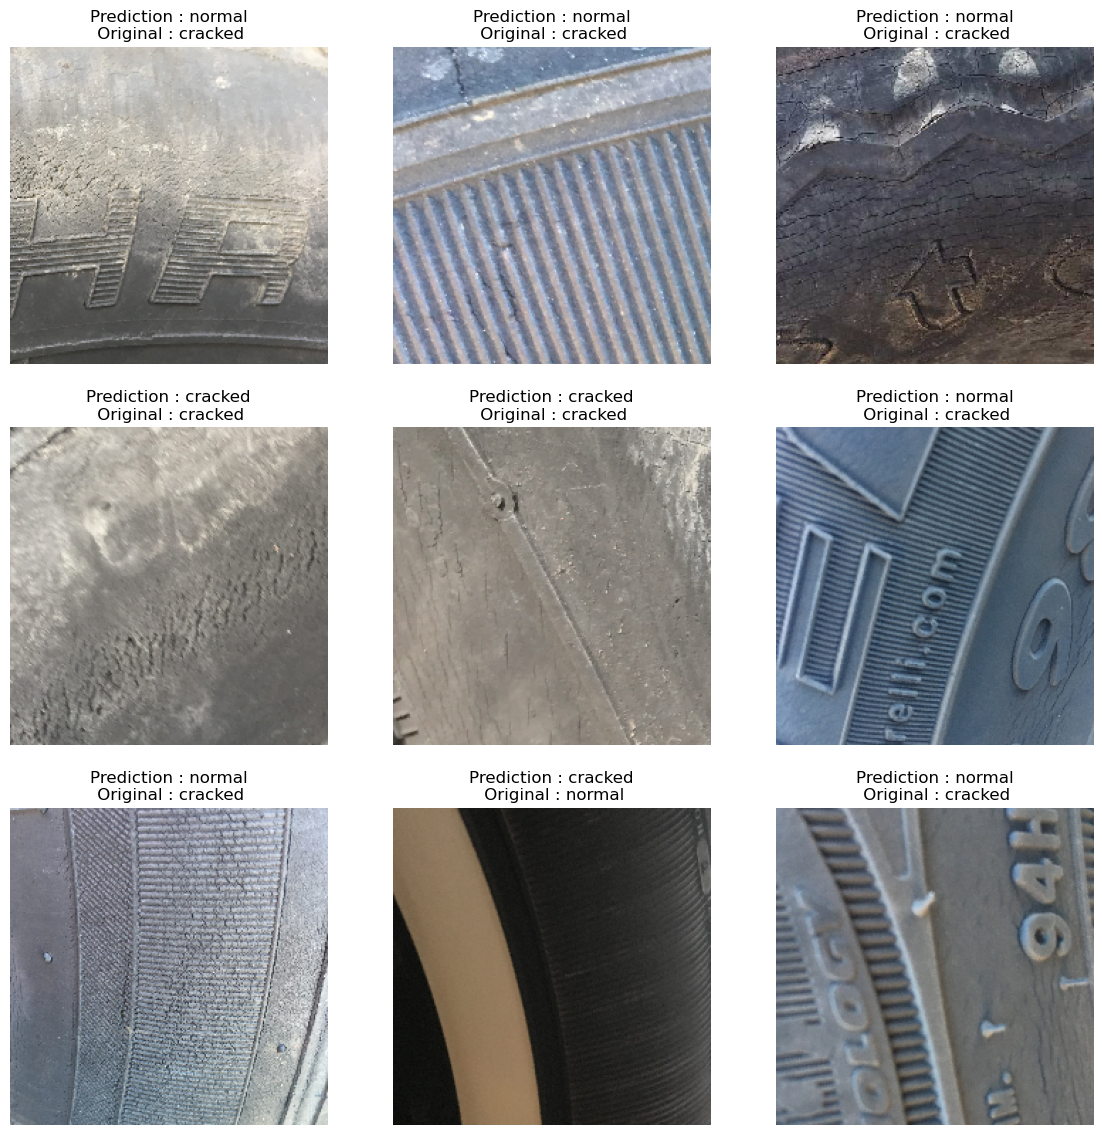

In [117]:
# using the Matplotlib library.
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(14,14)) #create a figure with size 14x14

for i in range(9):
    image,label = test_data.next() #get the next image and label from test data
    resnet_pred = resnet_model.predict(image) #predict the image using resnet model
    plt.subplot(3,3,i+1) 
    plt.imshow(image[i]) #show the image
    plt.title(f"Prediction : {test_label[tf.argmax(resnet_pred[i])]}\n Original : {test_label[tf.argmax(label[i])]}") #set the title of the subplot
    plt.axis("off") 


In [98]:
eff_label = [name for name in eff_test.class_names]
print(eff_label)


['cracked', 'normal']


1/1 [==============================] - 8s 8s/step


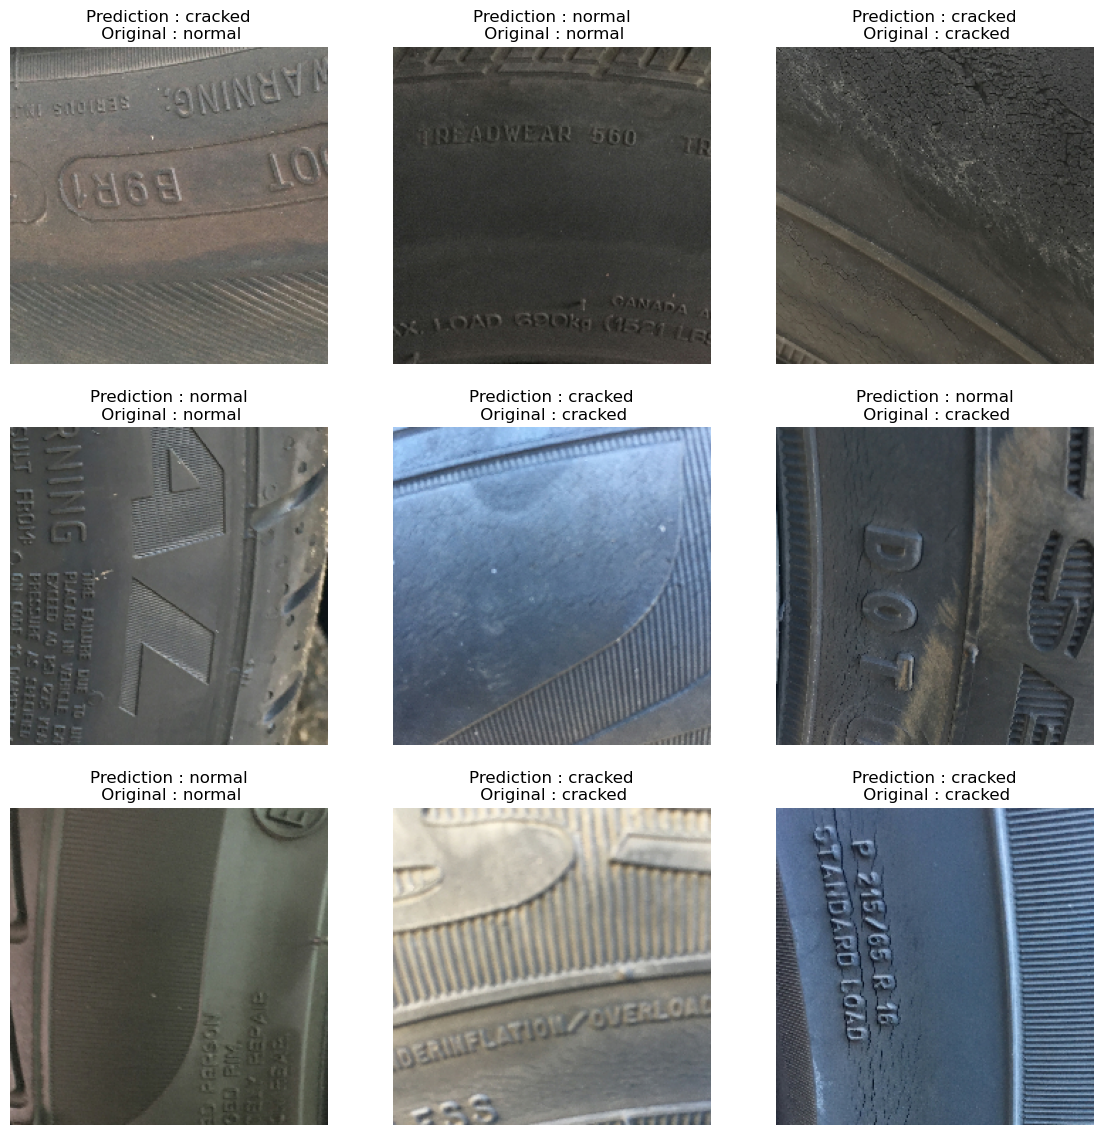

In [99]:
# Efficientnet model prediction and visualizing

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(14,14))

for image, label in eff_test.take(1):
    
    eff_pred = effnet_model.predict(image)
    for i in range(9):   
               
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(f"Prediction : {eff_label[tf.argmax(eff_pred[i])]}\n Original : {eff_label[tf.argmax(label[i])]}")
        plt.axis("off")

In [143]:
#generate predictions on test data and evaluates the performance of the model using a confusion matrix

# Fit your model on the training data
model.fit(train_data, epochs=10, validation_data=test_data)

# Generate predictions for the test data
predictions = model.predict(test_data)

# Convert the predictions to the class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels for the test data
true_classes = test_data.classes

# Create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print the confusion matrix
print(cm)


Epoch 1/10
22/22 [==============================] - 78s 3s/step - loss: 0.7004 - accuracy: 0.5249 - val_loss: 0.7196 - val_accuracy: 0.3538
Epoch 2/10
22/22 [==============================] - 65s 3s/step - loss: 0.6852 - accuracy: 0.5562 - val_loss: 0.7640 - val_accuracy: 0.3538
Epoch 3/10
22/22 [==============================] - 68s 3s/step - loss: 0.6654 - accuracy: 0.5818 - val_loss: 0.7379 - val_accuracy: 0.4831
Epoch 4/10
22/22 [==============================] - 70s 3s/step - loss: 0.6585 - accuracy: 0.6230 - val_loss: 0.7036 - val_accuracy: 0.5415
Epoch 5/10
22/22 [==============================] - 90s 4s/step - loss: 0.6408 - accuracy: 0.6330 - val_loss: 0.6912 - val_accuracy: 0.5877
Epoch 6/10
22/22 [==============================] - 57s 3s/step - loss: 0.6492 - accuracy: 0.6259 - val_loss: 0.6961 - val_accuracy: 0.5231
Epoch 7/10
22/22 [==============================] - 57s 3s/step - loss: 0.5879 - accuracy: 0.6799 - val_loss: 0.7534 - val_accuracy: 0.5723
Epoch 8/10
22/22 [==

In [145]:
#Show it directly (CM)
import tensorflow as tf

cm = tf.math.confusion_matrix(true_classes,predicted_classes)
print(cm)


tf.Tensor(
[[ 76 134]
 [ 48  67]], shape=(2, 2), dtype=int32)
